In [1]:
import pandas as pd
import requests
import json
import matplotlib
%matplotlib inline

# Dogecoin and Bitcoin market value for last 30 days, vs. USD, deliver a DF and a Plot

In [2]:
base = 'https://api.coingecko.com/api/v3/'

In [3]:
url = base + 'coins/bitcoin/market_chart?vs_currency=usd&days=30'

In [4]:
result = requests.get(url)
j_bc = result.json()

In [5]:
df_bc = pd.DataFrame(j_bc['prices'], columns=['time', 'price'])
df_bc.head(10)

,time,price
0,1583683533211,8395.577860
1,1583686972401,8348.131799
2,1583690739270,8350.322705
3,1583694256049,8302.136340
4,1583697770200,8323.456668
5,1583701534132,8292.962991
6,1583705049782,8224.685957
7,1583708563835,8223.540581
8,1583712454315,8050.873454
9,1583715630893,8091.591326


In [6]:
url = base + 'coins/dogecoin/market_chart'


In [7]:
param_dict = { 'id':'dogecoin', 'vs_currency':'usd', 'days':30}


In [8]:
result = requests.get(url, params=param_dict)


In [9]:
j_dc = result.json()
df_dc = pd.DataFrame(j_dc['prices'], columns=['time', 'price'])
df_dc.head(10)

,time,price
0,1583683521533,0.002266
1,1583687155571,0.002242
2,1583690864422,0.002248
3,1583694444668,0.002237
4,1583698053250,0.002236
5,1583701655091,0.002236
6,1583705142097,0.002233
7,1583708857570,0.002206
8,1583712290317,0.002174
9,1583715885459,0.002209


In [10]:
df_bc = pd.DataFrame(j_bc['prices'], columns=['time', 'price'])
df_bc['time'] = pd.to_datetime(df_bc['time'], unit='ms')

In [11]:
df_bc.set_index('time', inplace=True)
df_bc.head(10)

,price
time,
2020-03-08 16:05:33.211,8395.577860
2020-03-08 17:02:52.401,8348.131799
2020-03-08 18:05:39.270,8350.322705
2020-03-08 19:04:16.049,8302.136340
2020-03-08 20:02:50.200,8323.456668
2020-03-08 21:05:34.132,8292.962991
2020-03-08 22:04:09.782,8224.685957
2020-03-08 23:02:43.835,8223.540581
2020-03-09 00:07:34.315,8050.873454


In [12]:
df_dc = pd.DataFrame(j_dc['prices'], columns=['time', 'price'])
df_dc['time'] = pd.to_datetime(df_dc['time'], unit='ms')

df_dc.set_index('time', inplace=True)
df_dc.head(10)

,price
time,
2020-03-08 16:05:21.533,0.002266
2020-03-08 17:05:55.571,0.002242
2020-03-08 18:07:44.422,0.002248
2020-03-08 19:07:24.668,0.002237
2020-03-08 20:07:33.250,0.002236
2020-03-08 21:07:35.091,0.002236
2020-03-08 22:05:42.097,0.002233
2020-03-08 23:07:37.570,0.002206
2020-03-09 00:04:50.317,0.002174


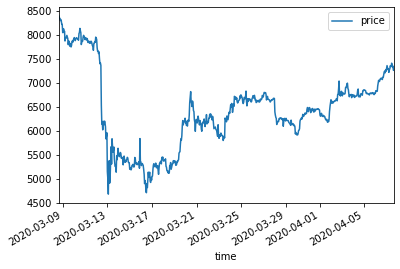

In [13]:
df_bc.plot()

![logo](Dogecoin_logo.png)

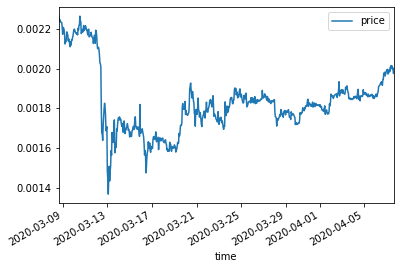

In [14]:
df_dc.plot()

# top ten coins report

In [15]:
url = base + 'coins/list'

In [16]:
result = requests.get(url)
j = result.json()

df_list = pd.DataFrame(j)
df_list.head(10)

,id,symbol,name
0,01coin,zoc,01coin
1,02-token,o2t,O2 Token
2,0cash,zch,0cash
3,0chain,zcn,0chain
4,0x,zrx,0x
5,0xcert,zxc,0xcert
6,0xdark,oxd,0xDark
7,0xeth-cash,0xech,0xETH Cash
8,0xeth-classic,0xetc,0xETH Classic
9,0xethereum-token,0xeth,0xEthereum Token


In [17]:
data_df = df_list.iloc[:10, 0]
data_df

0              01coin
1            02-token
2               0cash
3              0chain
4                  0x
5              0xcert
6              0xdark
7          0xeth-cash
8       0xeth-classic
9    0xethereum-token
Name: id, dtype: object

In [18]:
data_list = []

for i in data_df:
    base = "http://api.coingecko.com/api/v3/coins/"
    url = base + i + "/market_chart?vs_currency=usd&days=300"
    result = requests.get(url)
    data = result.json()
    data_df = pd.DataFrame(data['prices'], columns = ['date_time','price'])
    data_df["file_name"] = i
    data_list.append(data_df)

data_report = pd.concat(data_list)
data_report

,date_time,price,file_name
0,1560384000000,3.477176e-03,01coin
1,1560470400000,3.394577e-03,01coin
2,1560556800000,3.896259e-03,01coin
3,1560643200000,3.512342e-03,01coin
4,1560729600000,3.379261e-03,01coin
...,...,...,...
11,1584489600000,8.489999e-13,0xethereum-token
12,1584576000000,8.397907e-13,0xethereum-token
13,1585008000000,8.397907e-13,0xethereum-token
14,1585440000000,8.397907e-13,0xethereum-token


In [19]:
data_report = data_report.set_index('date_time')

data_report.head()

,price,file_name
date_time,,
1560384000000,0.003477,01coin
1560470400000,0.003395,01coin
1560556800000,0.003896,01coin
1560643200000,0.003512,01coin
1560729600000,0.003379,01coin


In [20]:
data_report.to_csv('top_ten_report.csv')

In [21]:
check = pd.read_csv('top_ten_report.csv')
check

,date_time,price,file_name
0,1560384000000,3.477176e-03,01coin
1,1560470400000,3.394577e-03,01coin
2,1560556800000,3.896259e-03,01coin
3,1560643200000,3.512342e-03,01coin
4,1560729600000,3.379261e-03,01coin
...,...,...,...
1622,1584489600000,8.489999e-13,0xethereum-token
1623,1584576000000,8.397907e-13,0xethereum-token
1624,1585008000000,8.397907e-13,0xethereum-token
1625,1585440000000,8.397907e-13,0xethereum-token
